In [1]:
'''
HW3 part (1), using the code from HW2
'''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_x(x, xnew):
    if len(x)>1:
        y = np.zeros(len(x))
        y[0] = x[1]
        y[1] = xnew
    else:
        y = [xnew]
    return y
    
def Iterative(method, f, x, other_params={}, tol=1e-12, maxit=100, verbose=False, print_res=True):
    itcnt = 0
    conv = False
    lenx = len(x)
    X = np.zeros(maxit+lenx)
    if len(x)>1:
        X[0:2] = x
    else:
        X[0] = x[-1]
    while True:
        x_next, val = method(f, x, other_params)
        # x_next = list of points for the next iteration
        # val = x_next as a scalar
        itcnt += 1
        X[itcnt+lenx-1] = val # record
        if verbose:
            print( f"#it = {itcnt:3d} : x = {val:.8f}")

        # evaluate stopping condition (converged?)
        if "sol" in other_params: # if sol is given
            conv = (np.abs(val - other_params["sol"]) < tol)
        else: # default
            if np.abs(f(val)) < tol:
                conv = True
            elif lenx>1:
                conv = (np.abs(x_next[1]-x_next[0]) < tol)
            else:
                conv = (np.abs(x_next[0] - x[0]) < tol)
        if conv:
            break

        # check if itcnt exceeded the max iteration limit
        if itcnt >= maxit:
            break

        # update x
        x = x_next
    X = X[:itcnt+lenx] # chop X
    if print_res:
        print(f"conv? = {conv}, #it = {itcnt:3d}, x = {val}")
    return X, conv

def Newton(f, x, params):
    x = x[0] # given as a list/array
    x_next = x - f(x)/params["df"](x) 
    return [x_next], x_next # return as a list

def Bisection(f, x, params):
    a = x[0]
    b = x[1]
    c =np.sum(x)/2.0
    if f(a)*f(c)<0:
        return [a, c], c
    else:
        return [c, b], c

def RegularFalsi(f, x, params):
    a = x[0]
    b = x[1]
    fa = f(a) # these f values actually can be saved and reused
    fb = f(b) # but we just compute it new for convenience
    c = (a*fb - b*fa)/(fb-fa)
    if f(a)*f(c)<0:
        return [a, c], c
    else:
        return [c, b], c

def Secant(f, x, params):
    a = x[0] # x_{k-1}
    b = x[1] # x_k
    c = b - f(b)*(b-a)/(f(b)-f(a))
    return [b, c], c # [x_k, x_{k+1}]



def plot_Errors(X, sol, label):
    X = np.abs(X-sol)
    plt.plot(X, label=label)
    plt.yscale('log')


conv? = True, #it =   5, x = 1.4142135623735754
conv? = True, #it =  39, x = 1.4142135623733338
conv? = True, #it =  80, x = 1.4142135623728886
conv? = True, #it =   9, x = 1.4142135623730974


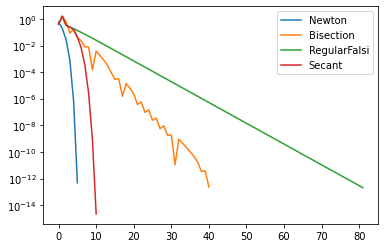

In [3]:
### Problem 1 ###

f = lambda x: x**3-2*x
df = lambda x: 3*x**2 - 2
sol = 2**(1/2)
a = 1
b = 3
x0 = (a+b)/2
X_nt, _ = Iterative(Newton, f, x = [x0], other_params={"sol":sol, "df": df}, verbose=False)
X_bs, _ = Iterative(Bisection, f, x = [a, b], verbose=False)
X_rf, _ = Iterative(RegularFalsi, f, x = [a, b], verbose=False)
X_sc, _ = Iterative(Secant, f, x = [a, b], verbose=False)
plot_Errors(X_nt, sol, "Newton")
plot_Errors(X_bs, sol, "Bisection")
plot_Errors(X_rf, sol, "RegularFalsi")
plot_Errors(X_sc, sol, "Secant")
plt.legend();

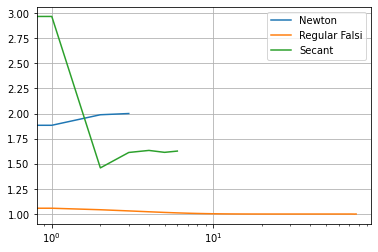

In [4]:
def alpha(x, sol):
    e = np.abs(x-sol)
    a = np.log( e[1:-1] / e[2:] ) / np.log ( e[:-2] / e[1:-1]) # log and division applied element-wise
    return a

alpha_nt = alpha(X_nt, sol)
alpha_bs = alpha(X_bs[2:], sol)
alpha_rf = alpha(X_rf[2:], sol)
alpha_sc = alpha(X_sc[2:], sol)

plt.plot(alpha_nt, label='Newton')
# plt.plot(alpha_bs, label='Bisection')
plt.plot(alpha_rf, label='Regular Falsi')
plt.plot(alpha_sc, label='Secant')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid()

conv? = True, #it =   4, x = 0.910007572488709
[0.75       0.84003968 0.87872235 0.89588343 0.90360368 0.90709843
 0.90868487 0.90940594]
[0.90785855 0.90956751 0.90991689 0.90998884 0.9100037  0.91000677]


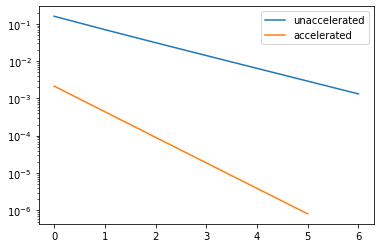

In [9]:
### Problem 3 ###

def nextiter(p):
    return (np.exp(p)/3)**0.5

N = 8 # number of terms in the sequence
pseq = np.zeros(N) # pre-allocate memory

pseq[0] = 0.75 # p0 in the problem

for i in range(1,N):
    pseq[i] = nextiter(pseq[i-1])

pacc = np.zeros(N-2)
for i in range(N-2):
    pacc[i] = (pseq[i]*pseq[i+2] - pseq[i+1]**2) / (pseq[i+2]-2*pseq[i+1]+pseq[i])

psol = pseq[-1] # sol guess
f = lambda x: (np.exp(x)/3)**0.5 - x # subtract x to find the fixed point
df = lambda x: 0.5*(np.exp(x)/3)**0.5 - 1
psol, _ = Iterative(Newton, f , [pseq[0]], {"df": df})
psol = psol[-1] # estimate the limit using Newton's method

plt.plot(np.abs(pseq[:-1]-psol), label='unaccelerated')
plt.plot(np.abs(pacc-psol), label='accelerated')
plt.yscale('log')
plt.legend();
print(pseq)
print(pacc)

conv? = True, #it =  38, x = 6.520314550811484e-13
conv? = True, #it =   6, x = 1.0


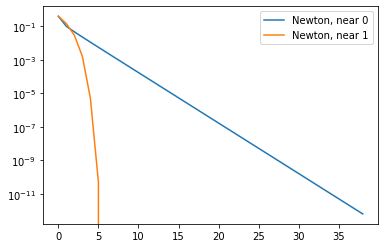

In [6]:
### Problem 5 ###
f = lambda x: x*x*(x-1)
df = lambda x: x*(3*x-2)

x0, sol0 = 0.4, 0
x1, sol1 = 1.4, 1
X0, _ = Iterative(Newton, f, [x0], other_params={"df":df, "sol":sol0})
X1, _ = Iterative(Newton, f, [x1], other_params={"df":df, "sol":sol1})

plot_Errors(X0, sol0, "Newton, near 0")
plot_Errors(X1, sol1, "Newton, near 1")
plt.legend();